In [1]:
import random

In [19]:
#part A:Tossing a coin
def coin_toss_simulation(trails=10000):
    heads = 0
    tails = 0

In [24]:
trials=10000
heads = 0
tails = 0
for _ in range(trials):
    toss = random.choice(["H", "T"])
    if toss == "H":
        heads += 1
    else:
        tails += 1

In [26]:
prob_heads = heads / trials
prob_tails = tails / trials
    
print("Coin Toss Simulation:")
print(f" Total Tosses: {trials}")
print(f" Heads: {heads} ({prob_heads:.4f})")
print(f" Tails: {tails} ({prob_tails:.4f})")
print("-" * 40)


Coin Toss Simulation:
 Total Tosses: 10000
 Heads: 4981 (0.4981)
 Tails: 5019 (0.5019)
----------------------------------------


In [34]:
#part B: Rolling Two Dices
def dice_roll_simulation(trials=10000):
    sum_seven = 0

In [37]:
trials=10000
sum_seven = 0
for _ in range(trials):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 + die2 == 7:
            sum_seven += 1
prob_seven = sum_seven / trials
print("Dice Roll Simulation:")
print(f" Total Rolls: {trials}")
print(f" Sum = 7 occurred: {sum_seven} times")
print(f" Experimental Probability of sum=7: {prob_seven:.4f}")
print("-" * 40)
coin_toss_simulation(10000)
dice_roll_simulation(10000)

Dice Roll Simulation:
 Total Rolls: 10000
 Sum = 7 occurred: 1672 times
 Experimental Probability of sum=7: 0.1672
----------------------------------------


In [38]:
#estimate the probability of getting at least one "6" in 10 rolls of a fair die.
def probability_at_least_one_six(trials=10000, rolls=10):
    success = 0  

In [43]:
trials=10000
rolls=10
success = 0
for _ in range(trials):
        found_six = False
        for _ in range(rolls):
            die = random.randint(1, 6)
            if die == 6:
                found_six = True
                break  # stop rolling since we already found a 6
        if found_six:
            success += 1
probability = success / trials
print(f"Simulation of {trials} trials:")
print(f" Rolls per trial: {rolls}")
print(f" Successful trials (at least one 6): {success}")
print(f" Experimental Probability: {probability:.4f}")

Simulation of 10000 trials:
 Rolls per trial: 10
 Successful trials (at least one 6): 8370
 Experimental Probability: 0.8370


In [ ]:
#Conditional Probability and Bayes' Theorem

In [44]:
#A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times
import random

In [45]:
def simulate_balls(trials=1000):
    colors = ["R"] * 5 + ["G"] * 7 + ["B"] * 8  # Bag composition
    draws = []

In [47]:
colors = ["R"] * 5 + ["G"] * 7 + ["B"] * 8
draws = []
for _ in range(trials):
        draws.append(random.choice(colors))

In [49]:
 # Step 2: Compute conditional probability P(R | prev = B)
red_given_blue_prev_count = 0
blue_prev_count = 0

In [51]:
 for i in range(1, len(draws)):  # start from 2nd draw
        if draws[i-1] == "B":   # check if previous is blue
            blue_prev_count += 1
            if draws[i] == "R":
                red_given_blue_prev_count += 1
 p_red_given_blue_prev = red_given_blue_prev_count / blue_prev_count if blue_prev_count > 0 else 0

In [54]:
# Step 3: Bayes theorem verification
    # P(R)
p_red = draws.count("R") / len(draws)
    # P(B_prev)
p_blue_prev = draws[:-1].count("B") / (len(draws) - 1)
    # P(B_prev | R)
blue_prev_given_red_count = 0
red_count = 0
for i in range(1, len(draws)):
    if draws[i] == "R":
        red_count += 1
        if draws[i-1] == "B":
            blue_prev_given_red_count += 1
p_blue_prev_given_red = blue_prev_given_red_count / red_count if red_count > 0 else 0
    

In [56]:
p_bayes = (p_blue_prev_given_red * p_red) / p_blue_prev if p_blue_prev > 0 else 0
print("Simulation Results:")
print(f" P(R | Previous=B) ≈ {p_red_given_blue_prev:.4f}")
print(f" Bayes' Theorem Result ≈ {p_bayes:.4f}")
print("-" * 40)
print(f" P(R) ≈ {p_red:.4f}")
print(f" P(Previous=B) ≈ {p_blue_prev:.4f}")
print(f" P(Previous=B | R) ≈ {p_blue_prev_given_red:.4f}")

Simulation Results:
 P(R | Previous=B) ≈ 0.2416
 Bayes' Theorem Result ≈ 0.2415
----------------------------------------
 P(R) ≈ 0.2468
 P(Previous=B) ≈ 0.4094
 P(Previous=B | R) ≈ 0.4007


In [57]:
#Random Variables and Discrete Probability
import numpy as np

In [59]:
values = [1,2,3]
probabilities = [0.25, 0.35, 0.40]
sample = np.random.choice(values, size=1000, p=probabilities) #sample size of 1000

In [61]:
mean_empirical = np.mean(sample)
variance_empirical = np.var(sample) 
std_dev_empirical = np.std(sample) 
print("Empirical Results from Sample of 1000:")
print(f" Mean = {mean_empirical:.4f}")
print(f" Variance = {variance_empirical:.4f}")
print(f" Standard Deviation = {std_dev_empirical:.4f}")

Empirical Results from Sample of 1000:
 Mean = 2.1510
 Variance = 0.6102
 Standard Deviation = 0.7812


In [63]:
#Continuous Random Variables
import numpy as np
import matplotlib.pyplot as plt
mean = 5
size = 2000
samples = np.random.exponential(scale=mean, size=size)

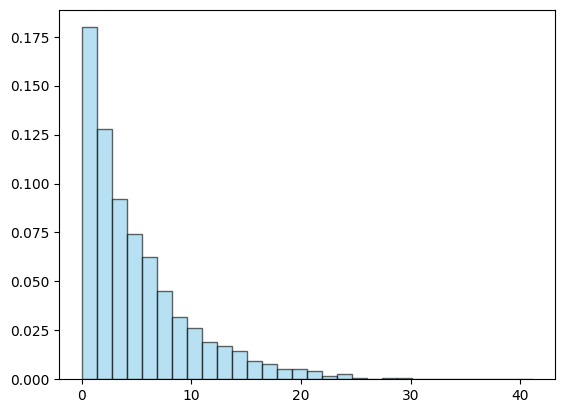

In [64]:
count, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histogram")

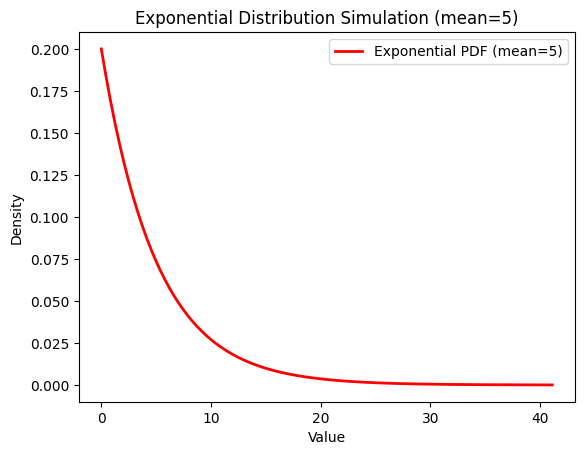

In [66]:
x = np.linspace(0, max(samples), 200)
pdf = (1/mean) * np.exp(-x/mean)  # Exponential PDF: f(x) = (1/λ) e^(-x/λ)
plt.plot(x, pdf, 'r-', lw=2, label="Exponential PDF (mean=5)")
plt.title("Exponential Distribution Simulation (mean=5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [67]:
#central limit theorem
import numpy as np 
import matplotlib.pyplot as plt
uniform_data = np.random.uniform(low=0, high=1, size=10000)  #10,000 random numbers from Uniform(0,1)

In [68]:
n = 30
sample_means = []
for _ in range(1000):
    sample = np.random.choice(uniform_data, size=n, replace=True)
    sample_means.append(np.mean(sample))
sample_means = np.array(sample_means)

In [69]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Density')

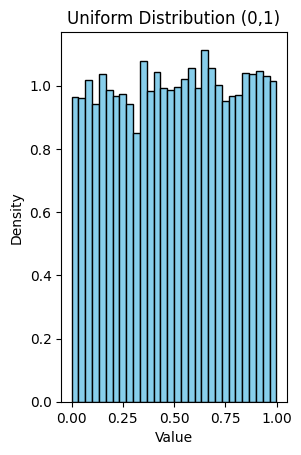

In [70]:
plt.subplot(1,2,1)
plt.hist(uniform_data, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title("Uniform Distribution (0,1)")
plt.xlabel("Value")
plt.ylabel("Density")

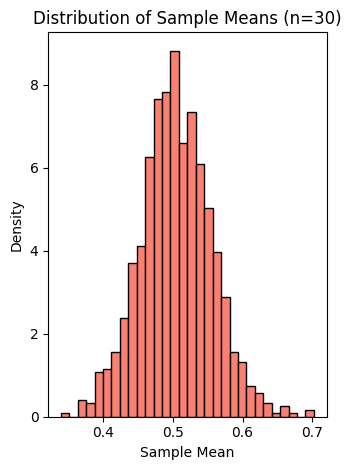

In [71]:
plt.subplot(1,2,2)
plt.hist(sample_means, bins=30, density=True, color='salmon', edgecolor='black')
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.tight_layout()
plt.show()